# Basic Info:
The Project Title is: The Epidemiology of COVID-19

Group member 1 
name: Austin Hickey
e-mail: U1041943@utah.edu
UID: U1041943

Group member 2
name: Spencer Sawas
e-mail: spencer.sawas@utah.edu
UID: U1065866

Group member 3
name: Marko Miholjcic
e-mail: u0984549@utah.edu
UID: u0984549

# Background and Motivation


Currently the world is facing a global pandemic with a new virus that has evolved and crossed over to humans. The virus known as COVID-19 affects the respiratory and cardiovascular systems by binding to the Ace-2 receptors. Ace-2 receptors are found throughout the cardiovascular and respiratory system. For this reason, the virus is extremely dangerous for susceptible populations. Currently, 30% of Americans suffer from cardiovascular diseases, 10% from diabetes, and 10% from asthma; these populations do not account for those who are immunocompromised or more susceptible for other reasons. 
The virus causes violent coughing, restricted breathing, inflammation, and cardiovascular hypertension (among other cardiovascular effects). Furthermore, it can cause pneumonia. Pneumonia can be fatal; especially if left untreated. 
Due to how transmissible the virus is, hospitals and healthcare workers across the world have been put to the test. The rapid spread of the virus has caused many hospitals to become overloaded with patients, with limited resources available. 

To try and curb the spread of the virus, countries across the world are temporarily shutting down and government officials have been recommended to social quarentine. Ripple effects have been detrimental to the economy. Millions of people have lost their jobs. People are dipping into their savings to pay rent, while others are unable to pay rent. Some economists have speculated an economic recession after the virus passes.  

# Project Objectives ***

Understand the severity of the global pandemic and predict the effects to come in the near future for states in the United States and countries around the world. Using predictive modeling techniques such as logistic regression, we will identify how long until the number of cases begins to plateau, how many cases there will be when it begins to plateau, and a prediction of the number of deaths a location will experience. 

We will use the predictive models to create plots to visualize the severity of the virus in the locations analyzed. Further, we will explore which states will be most heavily impacted. A geospatial map will be created to plot the spread of COVID-19 in the United States and identify the hospital beds per 1,000 for each state.

The benefits? 
What would you like to learn and accomplish?

These variables will provide an oppurtunity to perform a clustering analysis to determine if they are any realtionships between variables and the cases in a state. 

# Data


We will be using several sources of data in order to accurately represent the COVID-19 outbreaks and information relevant to analyzing contributing factors to the outbreak.

For the COVID-19 data we will use multiple APIs of a github repository to collect the number of cases, recoveries, and deaths over time for a number of countries and all of the US states. 
This data is a collection of data put together in csv format by John Hopkins Center for Systems Science and Engineering. Data extracted will be between the dates of January 22, 2020 and April 1, 2020. The github webpage is:
https://github.com/CSSEGISandData/COVID-19.

Below a single url is retrieved and placed into a dataframe in order to display the data that is imported from the API. Each day, the github repository updates the cumulative number of cases, recoveries, and deaths. The data also provides the province/state and country/region where the cases are occuring. 

In [1]:
import requests

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv'
response = requests.get(url)
response

<Response [200]>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(url)
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
5,Guangdong,Mainland China,1/22/2020 17:00,26.0,NaN,NaN
6,Guangxi,Mainland China,1/22/2020 17:00,2.0,NaN,NaN
7,Guizhou,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
8,Hainan,Mainland China,1/22/2020 17:00,4.0,NaN,NaN
9,Hebei,Mainland China,1/22/2020 17:00,1.0,NaN,NaN


To predict the number of deaths from COVID-19 that a particular country will experience, we will be extracting data from the WHO Healthcare index pdf. A countries healthcare index is a good indicator of how adept their healthcare infrastructure is, and how healthy a country is overall. The WHO healthcare index takes into account myriad of variables to rank every nations healthcare system.
https://www.who.int/healthinfo/paper30.pdf

In [ ]:
import pdfplumber
import pandas as pd
with pdfplumber.open(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\pdf_resources\world_health_index.pdf") as pdf:
    pages = pdf.pages[17]
    table = pages.extract_table()
    pages2 = pdf.pages[18]
    table2 = pages2.extract_table()
    pages3 = pdf.pages[19]
    table3 = pages3.extract_table()
    pages4 = pdf.pages[20]
    table4 = pages4.extract_table()
    
df = pd.DataFrame(table[1:], columns=table[1])
df.head()
df=df[['Rank','Member State', 'Index']]

data = pd.DataFrame(table2[1:], columns=table2[1])
data=data[['55','Albania', '0.774']]
data=data.rename(columns={'55':'Rank','Albania':'Member State', '0.774':'Index'})                
df=df.append(data,ignore_index=True)

data = pd.DataFrame(table3[1:], columns=table3[1])
data=data[['117','Uzbekistan', '0.599']]
data=data.rename(columns={'117':'Rank','Uzbekistan':'Member State', '0.599':'Index'})                 
df=df.append(data,ignore_index=True)

data = pd.DataFrame(table4[1:], columns=table4[1])
data=data[['178','Chad', '0.303']]
data=data.rename(columns={'178':'Rank','Chad':'Member State', '0.303':'Index'})                  
df=df.append(data,ignore_index=True)

for column in ["Rank", "Member State", 'Index']:
    df[column] = df[column].str.replace(" ", "")
    df[column] = df[column].replace('\n','', regex=True)
df=df.dropna()
df=df.drop([0])
df.set_index('Rank')
df['Rank']=df['Rank'].astype(int)
df['Index']=df['Index'].astype(float)
df['Member State']=df['Member State'].astype(str)
df

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)
    
df.to_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEAN_WorldHealthIndex.csv', index=False)

The population and population densities are collected from an csv file downloaded from the following website: http://worldpopulationreview.com/. We gathered two csv files from the website. One csv file had population data from the states while the other csv file had population data for all of the countries in the world. 

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/population_and_density_by_country.csv")
df

In [ ]:
df = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/population_and_population_density_USA.csv")
df

To find the size of the existing healthcare systems for each state (number of hospital beds per 1,000 people), the following website was utilized: https://www.kff.org/other/state-indicator/beds-by-ownership/?currentTimeframe=0&selectedDistributions=statelocal-government&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [ ]:
import pandas as pd
import requests

In [ ]:
from bs4 import BeautifulSoup

url = 'https://www.kff.org/other/state-indicator/beds-by-ownership/?currentTimeframe=0&selectedDistributions=statelocal-government&print=true&sortModel=%7B%22colId%22:%22State%2FLocal%20Government%22,%22sort%22:%22asc%22%7D'
response = requests.get(url)
response

In [ ]:
file = open("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/pdf_resources/HospitalBed.txt", "w")
file.write(response.text)
file = open("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/pdf_resources/HospitalBed.txt", "r")
content = file.readlines()
content

Furthermore, we will use data gathered from each county in the United States. This excel file will provide us with a plethora of variables to exlpore, such as the number of physicians per county for each state. The link to the website where the excel document was downloaded from is: https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation

In [ ]:
import pandas as pd

df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\2020 County Health Rankings Data - v1.csv',skiprows=1)

# Ethical considerations


If this were published, and publicly visible; we would not want our project to induce mass hysteria for the states that have been identified to be most severely impacted. It would also be important that our project does not identify a state that is least impacted- and influence them to go against governmental restrictions that were put in place.

As we are working with an ongoing crisis we are using the data while also upholding the real concequences this data is having on hundreds of thousands of lives in America and across the world. Our use of this data is not meant to be insensitive but instead to try and highlight exactly how extreme this can become. 

# Data Processing

All data processing will be done within jupyter notebook running python software. The API, CSV, and data obtained from web scraping will all need to be loaded into a jupyter notebook and will converted from JSON, dictionary, and/or lists into a pandas data frame for processing and analysis.
The github repository had multiple formats for date and the abbreviations of locations where cases had occured. Therefore, most APIs had their format altered in order to create consistency between the dates and locations of the data.

In [ ]:
import requests
import pandas as pd

dates = ['01-22', '01-23', '01-24', '01-25', '01-26', '01-27', '01-28', '01-29', '01-30', '01-31']

df = pd.DataFrame()

for x in range(len(dates)):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dates[x] + '-2020.csv'
    response = requests.get(str(url))
        
    df1 = pd.read_csv(url)
    df1['Last Update'] = df1['Last Update'].apply(lambda x : "0" + x[0:7] + "20")
    states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
    abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

    for x in range(51):
        df1["Province/State"] = df1["Province/State"].replace(states[x], abb[x])
    
        df1["Province/State"] = df1["Province/State"].replace("Chicago", "IL")    
    df = df.append(df1, ignore_index = True)

#df 

In [ ]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-01-2020.csv'
response = requests.get(url)

df1 = pd.read_csv(url)
df1['Last Update'] = df1['Last Update'].apply(lambda x : "0" + x[0:1] + "/0" + x[2:6] + "20")
mask = df1['Last Update'] == "02/01/2020"
df1 = df1.loc[mask]

df1["Province/State"] = df1["Province/State"].fillna("none") 
df1['Province/State'] = df1['Province/State'].apply(lambda x : x[-2:])
df = df.append(df1, ignore_index = True)
#df

In [ ]:
dates2 = ['02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11', '02-12',
        '02-13', '02-14', '02-15', '02-16', '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23',
        '02-24', '02-25', '02-26', '02-27', '02-28', '02-29']

for x in range(len(dates2)):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dates2[x] + '-2020.csv'
    response = requests.get(url)

    df1 = pd.read_csv(url)
    df1['Last Update'] = df1['Last Update'].apply(lambda x : "0" + x[6:10] + "/" + "2020")
    df1['Last Update'] = df1['Last Update'].apply(lambda x : x.replace("-", "/"))
    mask = df1['Last Update'] == df1['Last Update'][0]
    df1 = df1.loc[mask]

    df1["Province/State"] = df1["Province/State"].replace("Omaha, NE (From Diamond Princess)", "NE")
    df1["Province/State"] = df1["Province/State"].replace("Travis, CA (From Diamond Princess)", "CA")
    df1["Province/State"] = df1["Province/State"].replace("Lackland, TX (From Diamond Princess)", "TX")

    df1["Province/State"] = df1["Province/State"].fillna("none") 
    df1['Province/State'] = df1['Province/State'].apply(lambda x : x[-2:])

    df = df.append(df1, ignore_index = True)

#df

In [ ]:
dates3 = ['03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07', '03-08', '03-09']

for x in range(len(dates3)):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dates3[x] + '-2020.csv'
    response = requests.get(url)

    df1 = pd.read_csv(url)
    df1 = df1[["Province/State", "Country/Region",  "Last Update", "Confirmed", "Deaths", "Recovered"]]
    df1['Last Update'] = df1['Last Update'].apply(lambda x : "0" + x[6:7] + "/0" + x[9] + "/" + "2020")
    df1['Last Update'] = df1['Last Update'].apply(lambda x : x.replace("-", "/"))
    mask = df1['Last Update'] == df1['Last Update'][0]
    df1 = df1.loc[mask]

    df1["Province/State"] = df1["Province/State"].replace("Omaha, NE (From Diamond Princess)", "NE")
    df1["Province/State"] = df1["Province/State"].replace("Travis, CA (From Diamond Princess)", "CA")
    df1["Province/State"] = df1["Province/State"].replace("Lackland, TX (From Diamond Princess)", "TX")
    df1["Province/State"] = df1["Province/State"].replace("Washington, D.C.", "DC")

    df1["Province/State"] = df1["Province/State"].fillna("none") 
    df1['Province/State'] = df1['Province/State'].apply(lambda x : x[-2:])

    df = df.append(df1, ignore_index = True)
    
#df

In [ ]:
dates4 = ['03-10', '03-11', '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', 
        '03-18', '03-19', '03-20', '03-21']

for x in range(len(dates4)):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dates4[x] + '-2020.csv'
    response = requests.get(url)

    df1 = pd.read_csv(url)
    df1 = df1[["Province/State", "Country/Region",  "Last Update", "Confirmed", "Deaths", "Recovered"]]
    df1['Last Update'] = df1['Last Update'].apply(lambda x : "0" + x[6:10] + "/" + "2020")
    df1['Last Update'] = df1['Last Update'].apply(lambda x : x.replace("-", "/"))
    mask = df1['Last Update'] == df1['Last Update'][0]
    df1 = df1.loc[mask]
    states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
    abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

    for x in range(51):
        df1["Province/State"] = df1["Province/State"].replace(states[x], abb[x])
    
    df = df.append(df1, ignore_index = True)
    
#df

In [ ]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-22-2020.csv'
response = requests.get(url)

df1 = pd.read_csv(url)
df1 = df1.rename(columns={"Province_State": "Province/State", "Country_Region": "Country/Region", "Last_Update": "Last Update"})
df1 = df1[["Province/State", "Country/Region", "Last Update", "Confirmed", "Deaths", "Recovered"]]

df1['Last Update'] = df1['Last Update'].apply(lambda x :"0" + x[0:7] + "20")
mask = df1['Last Update'] == df1['Last Update'][0]
df1 = df1.loc[mask]

states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

for x in range(51):
    df1["Province/State"] = df1["Province/State"].replace(states[x], abb[x])

df = df.append(df1, ignore_index = True)
#df

In [ ]:
dates5 = ['03-23', '03-24', '03-25', '03-26', '03-27', '03-28', 
        '03-29', '03-30', '03-31', '04-01']

for x in range(len(dates5)):
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dates5[x] + '-2020.csv'
    response = requests.get(url)
    
    df1 = pd.read_csv(url)
    df1 = df1.rename(columns={"Province_State": "Province/State", "Country_Region": "Country/Region", "Last_Update": "Last Update"})
    df1 = df1[["Province/State", "Country/Region", "Last Update", "Confirmed", "Deaths", "Recovered"]]

    df1['Last Update'] = df1['Last Update'].apply(lambda x : "0" + x[6:10] + "/2020")
    df1['Last Update'] = df1['Last Update'].apply(lambda x : x.replace("-", "/"))
    mask = df1['Last Update'] == df1['Last Update'][0]
    df1 = df1.loc[mask]
    states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
    abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

    for x in range(51):
        df1["Province/State"] = df1["Province/State"].replace(states[x], abb[x])

    df = df.append(df1, ignore_index = True)
    
df

In [ ]:
df.to_csv('/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CDRdata.csv', index = False)

After saving the dataframe with all of the countries, the following lines of code, selected the desired countries and US states for analysis.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CDRdata.csv")
#df

In [ ]:
df = pd.read_csv("/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CDRdata.csv")
#df

In [ ]:
df = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CDRdata.csv")
#df

In [ ]:
df.describe()

In [ ]:
df["Confirmed"] = df["Confirmed"].fillna(0)
df["Deaths"] = df["Deaths"].fillna(0)
df["Recovered"] = df["Recovered"].fillna(0)
#df

In [ ]:
df = df[["Country/Region", "Last Update", "Confirmed", "Deaths", "Recovered"]]
#df

In [ ]:
df["Country/Region"] = df["Country/Region"].replace("Mainland China", "China")
df["Country/Region"] = df["Country/Region"].replace("Korea, South", "South Korea")
df["Country/Region"] = df["Country/Region"].replace("UK", "United Kingdom")
#df

In [ ]:
countries = ['US', 'China', 'Italy', 'New Zealand', 'South Korea', 'United Kingdom', 'Iran', 'Australia', 'India', 'Peru']
df = df.loc[df['Country/Region'].isin(countries)]
#df

In [ ]:
df["Confirmed"] = df["Confirmed"].astype("int")
df["Deaths"] = df["Deaths"].astype("int")
df["Recovered"] = df["Recovered"].astype("int")
df

In [ ]:
df.to_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRData.csv', index = False)

In [ ]:
df.to_csv('/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANCDRData.csv', index = False)

In [ ]:
df.to_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRData.csv', index = False)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CDRdata.csv")
#df

In [ ]:
df.describe()

In [ ]:
df["Confirmed"] = df["Confirmed"].fillna(0)
df["Deaths"] = df["Deaths"].fillna(0)
df["Recovered"] = df["Recovered"].fillna(0)
#df

In [ ]:
data = df[df["Country/Region"] == "US"]
#data

In [ ]:
abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

dataUS = data[data["Province/State"].isin(abb)]
dataUS

In [ ]:
dataUS.to_csv('/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/usaCLEANCDRData.csv', index = False)

Data had to be extracted from the pdf for each country.  

In [ ]:
import pdfplumber
import pandas as pd
with pdfplumber.open(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\pdf_resources\world_health_index.pdf") as pdf:
    pages = pdf.pages[17]
    table = pages.extract_table()
    pages2 = pdf.pages[18]
    table2 = pages2.extract_table()
    pages3 = pdf.pages[19]
    table3 = pages3.extract_table()
    pages4 = pdf.pages[20]
    table4 = pages4.extract_table()
    
df = pd.DataFrame(table[1:], columns=table[1])
df.head()
df=df[['Rank','Member State', 'Index']]

data = pd.DataFrame(table2[1:], columns=table2[1])
data=data[['55','Albania', '0.774']]
data=data.rename(columns={'55':'Rank','Albania':'Member State', '0.774':'Index'})                
df=df.append(data,ignore_index=True)

data = pd.DataFrame(table3[1:], columns=table3[1])
data=data[['117','Uzbekistan', '0.599']]
data=data.rename(columns={'117':'Rank','Uzbekistan':'Member State', '0.599':'Index'})                 
df=df.append(data,ignore_index=True)

data = pd.DataFrame(table4[1:], columns=table4[1])
data=data[['178','Chad', '0.303']]
data=data.rename(columns={'178':'Rank','Chad':'Member State', '0.303':'Index'})                  
df=df.append(data,ignore_index=True)

for column in ["Rank", "Member State", 'Index']:
    df[column] = df[column].str.replace(" ", "")
    df[column] = df[column].replace('\n','', regex=True)
df=df.dropna()
df=df.drop([0])
df.set_index('Rank')
df['Rank']=df['Rank'].astype(int)
df['Index']=df['Index'].astype(float)
df['Member State']=df['Member State'].astype(str)
df

The countries included in the report were selected from the population data. The datatypes were changed to integers where appropriate. 

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/population_and_density_by_country.csv")
#df

In [ ]:
df = pd.read_csv("/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/population_and_density_by_country.csv")
#df

In [ ]:
df = df[["name","Rank", "pop2019", "GrowthRate", "area", "Density"]]
#df

In [ ]:
countries = ['China','United States', 'Italy', 'New Zealand', 'South Korea', 'United Kingdom', 'Iran', 'Singapore', 'India', 'Peru']
df = df.loc[df['name'].isin(countries)]
df

In [ ]:
df['pop2019'] = df['pop2019'].astype('int')
df['area'] = df['area'].astype('int')
#df

In [ ]:
df.describe()

In [ ]:
df.to_csv(r'/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANpopulation_and_density_by_country.csv', index = False)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/population_and_population_density_USA.csv")
#df

In [ ]:
df.describe()

In [ ]:
#People per square mile

In [ ]:
df2 = pd.read_csv('/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files//csv_files/CLEANpopulation_and_population_density_USA.csv')

In [ ]:
df2 = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANpopulation_and_population_density_USA.csv')

The data in the file containing the size of the existing healthcare systems for each state (number of hospital beds per 1,000 people) was extracted. The website had a figure that contained all of the hospital bed data for each state. Beautiful soup and string concatenation were utilized in order to scrap the information from the figure on the website. 

In [ ]:
import pandas as pd
import requests

In [ ]:
from bs4 import BeautifulSoup

url = 'https://www.kff.org/other/state-indicator/beds-by-ownership/?currentTimeframe=0&selectedDistributions=statelocal-government&print=true&sortModel=%7B%22colId%22:%22State%2FLocal%20Government%22,%22sort%22:%22asc%22%7D'
response = requests.get(url)
response

In [ ]:
file = open("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/pdf_resources/HospitalBed.txt", "w")
file.write(response.text)
file = open("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/pdf_resources/HospitalBed.txt", "r")
content = file.readlines()
#content

In [ ]:
BigSoup = BeautifulSoup()

soup = BeautifulSoup(open("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/pdf_resources/HospitalBed.txt"), "html.parser")
BigSoup.append(soup)

print(BigSoup.prettify())

In [ ]:
littlesoup = BigSoup.find(id = "content")
ls = str(littlesoup)
print(ls)

indexS = ls.find('["Alabama"')
indexE = ls.find(']],["2017"')

data_s = ls[indexS:indexE]


In [ ]:
#print(data_s)

In [ ]:
data_s = "[" + data_s + "]"
#data_s

In [ ]:
import ast
data = ast.literal_eval(data_s)

In [ ]:
#data

In [ ]:
columns = ["Location","State\Local Government","Non-Profit","For-Profit", "Total"]

df = pd.DataFrame(data, columns = columns)
#df

In [ ]:
df = df[["Location", "Total"]]
df

In [ ]:
df.dtypes

In [ ]:
df.to_csv(r'/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/pdf_resources/HospitalBed.txt', index = False)

The Country Data had to be processed. 27 variables were chosen for the County Data and were placed in a dataframe. The empty entires were filled with 0 values. 

In [ ]:
import pandas as pd

df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\2020 County Health Rankings Data - v1.csv',skiprows=1)
df=df[['State','County','Deaths','Years of Potential Life Lost Rate','Average Number of Physically Unhealthy Days','Average Number of Mentally Unhealthy Days','% Smokers','% Adults with Obesity','Food Environment Index','% Physically Inactive','% With Access to Exercise Opportunities','Chlamydia Rate','% Uninsured','# Primary Care Physicians','Primary Care Physicians Rate','Preventable Hospitalization Rate','% Vaccinated','High School Graduation Rate','% Some College','% Unemployed','% Children in Poverty','Income Ratio','% Single-Parent Households','Social Association Rate','Average Daily PM2.5','% Severe Housing Problems','% Long Commute - Drives Alone']]
df.set_index('State')
df['County'].fillna(0,inplace=True)

statelvl=df.loc[df['County']==0]
statelvl=statelvl.drop(['County'],axis=1)

#Nan pm2.5 values filled in with this source: http://berkeleyearth.lbl.gov/air-quality/local/United_States_of_America/Hawaii
statelvl.loc[statelvl['State']=='Alaska','Average Daily PM2.5']=12
statelvl.loc[statelvl['State']=='Hawaii','Average Daily PM2.5']=3.9 
#statelvl.dtypes
statelvl.to_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\Nation_HealthSurvey_Variables.csv', index=False)

# Exploratory Analysis

Plotted a time series for the selected states. 

In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
data = pd.read_csv(r"/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/usaCLEANCDRData.csv")
#data

In [ ]:
data = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\usaCLEANCDRData.csv")

In [ ]:
date1 = '01/22/2020'
date2 = '04/01/2020'
mydates = pd.date_range(date1, date2).tolist()
#mydates

In [ ]:
dates = pd.DataFrame(mydates)
dates = dates.rename(columns = {0:"Date1"})
#dates = dates.set_index("Date")

dates['Date'] = dates['Date1'].dt.strftime('%m/%d/%Y')
dates = dates.set_index("Date")
#dates

In [ ]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

df = pd.DataFrame()

for x in range(len(states)):
    dataU = data[data["Province/State"] == states[x]]  
    groupDate = dataU.groupby("Last Update")
    df1 = groupDate.count()

    df1 = list(df1.index.values)
    df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%Y'))

    dfDate = pd.DataFrame(df1)
    
    dataC = data[data["Province/State"] == states[x]]
    groupC = dataC.groupby("Last Update")
    dC = groupC.sum()
    dC = list(dC["Confirmed"].values)
    
    dC.sort()
    
    dfC = pd.DataFrame({states[x]: dC})
    dfC = pd.concat([dfDate,dfC], axis=1, sort = False)
    dfC = dfC.rename(columns={0: "Date"})
    dfC = dfC.set_index('Date')
    
    df = pd.concat([df,dfC], axis=1, sort = False)
    
#df

In [ ]:
df = pd.concat([dates, df], axis=1, sort=False)

In [ ]:
#df 

In [ ]:
df[["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
    "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", 
    "ND", "OH","OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", 
    "WI", "WY", "DC"]] = df[["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN",
                             "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", 
                             "NH", "NJ", "NM", "NY", "NC", "ND", "OH","OK", "OR", "PA", "RI", "SC", "SD", "TN", 
                             "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]].interpolate()
df=df.fillna(0)
df

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30, 45)

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

fig, axs = plt.subplots(17, 3)
for i in range(17):
    axs[i,0].plot(pd.DataFrame(df[states[3*i]]))
    axs[i,0].set_title(states[3*i])
    axs[i,1].plot(pd.DataFrame(df[states[3*i+1]]))
    axs[i,1].set_title(states[3*i+1]) 
    axs[i,2].plot(pd.DataFrame(df[states[3*i+2]]))
    axs[i,2].set_title(states[3*i+2])
    
for ax in axs.flat:
    ax.set(xlabel='Date')
    ax.tick_params(labelrotation=90, axis = 'x')
       
for ax in axs.flat:
    ax.label_outer()
    
stepsize = 5
for ax in axs.flat:
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, stepsize))
    
fig.text(0.1, 0.5, 'Confirmed Cases', ha='center', va='center', rotation='vertical', fontsize=28)

plt.text(-60, 13250, 'Boxplots for all of the States', ha='center', va='center', rotation='horizontal', fontsize=28)

In [ ]:
plt.figure(figsize=(5, 5))
state = ['NY', 'UT', 'ID', 'IL', 'WA']

dfdata = pd.DataFrame()

for x in range(len(state)):
    df1 = pd.DataFrame(df[state[x]])
    dfdata = pd.concat([dfdata, df1], axis = 1, sort = False)

dfdata    
dfdata.plot(grid = True, figsize = (10,10),title="Comparison of the Total Cases from 5 states");
plt.legend(loc=2, prop={'size': 15})

plt.text(-7, 40000, 'Confirmed Cases', ha='center', va='center', rotation='vertical', fontsize=12)
plt.text(35, -10000, 'Dates', ha='center', va='center', rotation='horizontal', fontsize=12)

Plotted a time series for the selected countries. 

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
data = pd.read_csv(r"/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANCDRData.csv")
#data

,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,China,1/22/20,1,0,0
1,China,1/22/20,14,0,0
2,China,1/22/20,6,0,0
3,China,1/22/20,1,0,0
4,China,1/22/20,0,0,0
5,China,1/22/20,26,0,0
6,China,1/22/20,2,0,0
7,China,1/22/20,1,0,0
8,China,1/22/20,4,0,0
9,China,1/22/20,1,0,0


In [ ]:
data = pd.read_csv(r"C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRData.csv")

In [3]:
countries = ["China", "US", "Italy", "New Zealand", "South Korea", "United Kingdom", "Iran", "Australia", 
             "India", "Peru"]

df = pd.DataFrame()

for x in range(len(countries)):
    dataU = data[data["Country/Region"] == countries[x]]  
    groupDate = dataU.groupby("Last Update")
    df1 = groupDate.count()

    df1 = list(df1.index.values)
    df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

    dfDate = pd.DataFrame(df1)
    
    dataC = data[data["Country/Region"] == countries[x]]
    groupC = dataC.groupby("Last Update")
    dC = groupC.sum()
    dC = list(dC["Confirmed"].values)
    
    dC.sort()
    
    dfC = pd.DataFrame({countries[x]: dC})
    dfC = pd.concat([dfDate,dfC], axis=1, sort = False)
    dfC = dfC.rename(columns={0: "Date"})
    dfC = dfC.set_index('Date')
    
    df = pd.concat([df,dfC], axis=1, sort = False)
    
#df

,China,US,Italy,New Zealand,South Korea,United Kingdom,Iran,Australia,India,Peru
1/22/20,547,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1/23/20,639,1.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN
1/24/20,916,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1/25/20,1399,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN
1/26/20,2062,2.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN
1/27/20,2863,2.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN
1/28/20,5494,2.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN
1/29/20,6070,3.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN
1/30/20,8124,3.0,NaN,NaN,4.0,NaN,NaN,5.0,1.0,NaN
1/31/20,9783,4.0,2.0,NaN,11.0,2.0,NaN,5.0,1.0,NaN


In [4]:
df[['US','Italy','South Korea','United Kingdom', 'Iran','Australia', 'India', 'Peru']]= df[['US','Italy','South Korea','United Kingdom', 'Iran','Australia', 'India', 'Peru']].interpolate()
df=df.fillna(0)
#df

,China,US,Italy,New Zealand,South Korea,United Kingdom,Iran,Australia,India,Peru
1/22/20,547,1.00,0.000000,0.0,1.0,0.000000,0.0,0.00,0.000000,0.0
1/23/20,639,1.00,0.000000,0.0,1.0,0.000000,0.0,0.00,0.000000,0.0
1/24/20,916,1.00,0.000000,0.0,2.0,0.000000,0.0,1.00,0.000000,0.0
1/25/20,1399,1.00,0.000000,0.0,2.0,0.000000,0.0,2.00,0.000000,0.0
1/26/20,2062,2.00,0.000000,0.0,3.0,0.000000,0.0,3.00,0.000000,0.0
1/27/20,2863,2.00,0.000000,0.0,4.0,0.000000,0.0,4.00,0.000000,0.0
1/28/20,5494,2.00,0.000000,0.0,4.0,0.000000,0.0,4.00,0.000000,0.0
1/29/20,6070,3.00,0.000000,0.0,4.0,0.000000,0.0,4.00,0.000000,0.0
1/30/20,8124,3.00,0.000000,0.0,4.0,0.000000,0.0,5.00,1.000000,0.0
1/31/20,9783,4.00,2.000000,0.0,11.0,2.000000,0.0,5.00,1.000000,0.0


Text(-10, 5700, 'Boxplot for all of the Countries')

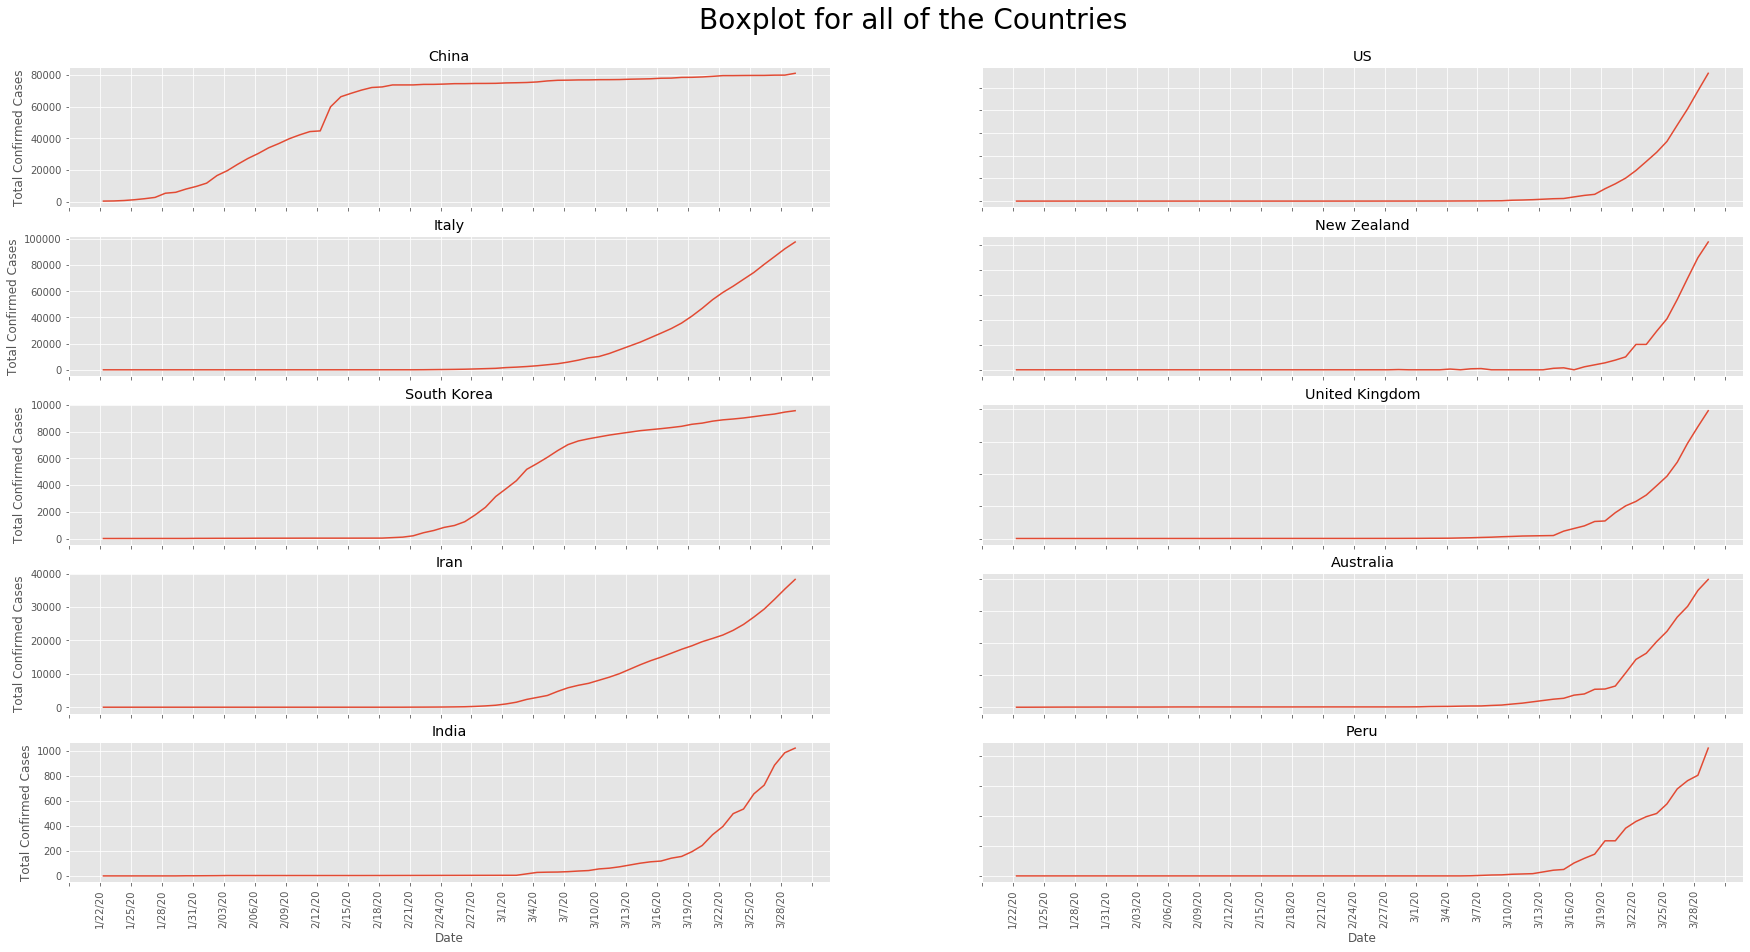

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30, 15)

countries = ["China", "US", "Italy", "New Zealand", "South Korea", "United Kingdom", "Iran", "Australia", 
             "India", "Peru"]

fig, axs = plt.subplots(5, 2)
for i in range(5):
    axs[i,0].plot(pd.DataFrame(df[countries[2*i]]))
    axs[i,0].set_title(countries[2*i])
    axs[i,1].plot(pd.DataFrame(df[countries[2*i+1]]))
    axs[i,1].set_title(countries[2*i+1])  
    
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Total Confirmed Cases')
    ax.tick_params(labelrotation=90, axis = 'x')
       
for ax in axs.flat:
    ax.label_outer()
    
stepsize = 3
for ax in axs.flat:
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, stepsize))
    
plt.text(-10, 5700, 'Boxplot for all of the Countries', ha='center', va='center', rotation='horizontal', fontsize=28)

Text(35, -15000, 'Dates')

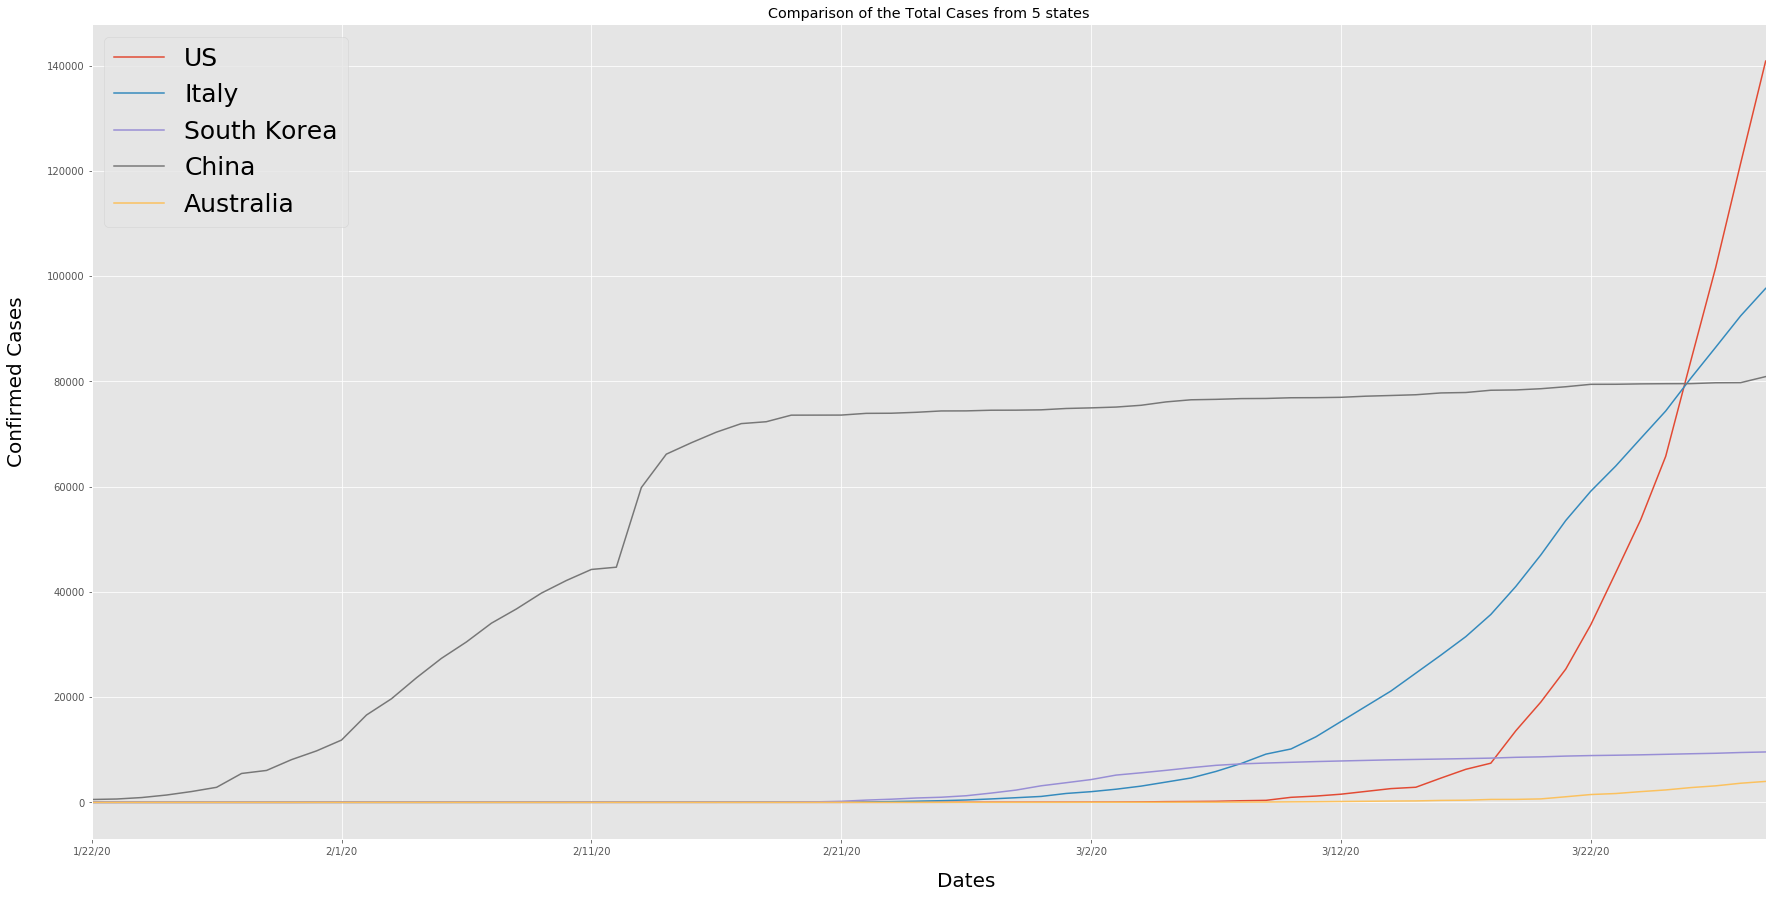

In [6]:
countries = ['US','Italy','South Korea','China','Australia']

dfdata = pd.DataFrame()

for x in range(len(countries)):
    df1 = pd.DataFrame(df[countries[x]])
    dfdata = pd.concat([dfdata, df1], axis = 1, sort = False)

dfdata    
dfdata.plot(grid = True, title="Comparison of the Total Cases from 5 states")
plt.xlab = "Date" 
plt.ylab = "Total Confirmed Cases"
plt.legend(loc=2, prop={'size': 25})

plt.text(-3, 80000, 'Confirmed Cases', ha='center', va='center', rotation='vertical', fontsize=20)
plt.text(35, -15000, 'Dates', ha='center', va='center', rotation='horizontal', fontsize=20)

# Analysis Methodology

We performed some clustering. 

In [1]:
# imports and setup 
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/Nation_HealthSurvey_Variables.csv")

df2 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANHospitals.csv")

df3 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANpopulation_and_population_density_USA.csv")

df4 = pd.read_csv(r"/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/usaCLEANCDRData.csv")

states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

for x in range(51):
    df4["Province/State"] = df4["Province/State"].replace(abb[x], states[x])
        
df4 = df4[df4["Last Update"] == "04/01/2020"]
groupData = df4.groupby("Province/State")
df4 = groupData.sum()

df1 = df1.rename(columns = {"State": "Province/State"})
df1 = df1.set_index('Province/State')
df2 = df2.rename(columns={"Location": "Province/State"})
df2 = df2.rename(columns ={"Total": "Total Beds"})
df2 = df2.set_index('Province/State')
df3 = df3.rename(columns = {"State": "Province/State"})
df3 = df3.set_index('Province/State')
df4 = df4.rename(columns = {"Deaths": "COVID Deaths"})
df4 = df4[["COVID Deaths"]]
df4

df = pd.concat([df1,df2], axis=1, sort = False)
df = pd.concat([df, df3], axis = 1, sort = False)
df = pd.concat([df, df4], axis = 1, sort = False)
df = df.drop('Deaths', axis=1)

df.dtypes

Years of Potential Life Lost Rate              float64
Average Number of Physically Unhealthy Days    float64
Average Number of Mentally Unhealthy Days      float64
% Smokers                                        int64
% Adults with Obesity                            int64
Food Environment Index                         float64
% Physically Inactive                            int64
% With Access to Exercise Opportunities        float64
Chlamydia Rate                                 float64
% Uninsured                                    float64
# Primary Care Physicians                      float64
Primary Care Physicians Rate                   float64
Preventable Hospitalization Rate               float64
% Vaccinated                                   float64
High School Graduation Rate                    float64
% Some College                                   int64
% Unemployed                                   float64
% Children in Poverty                          float64
Income Rat

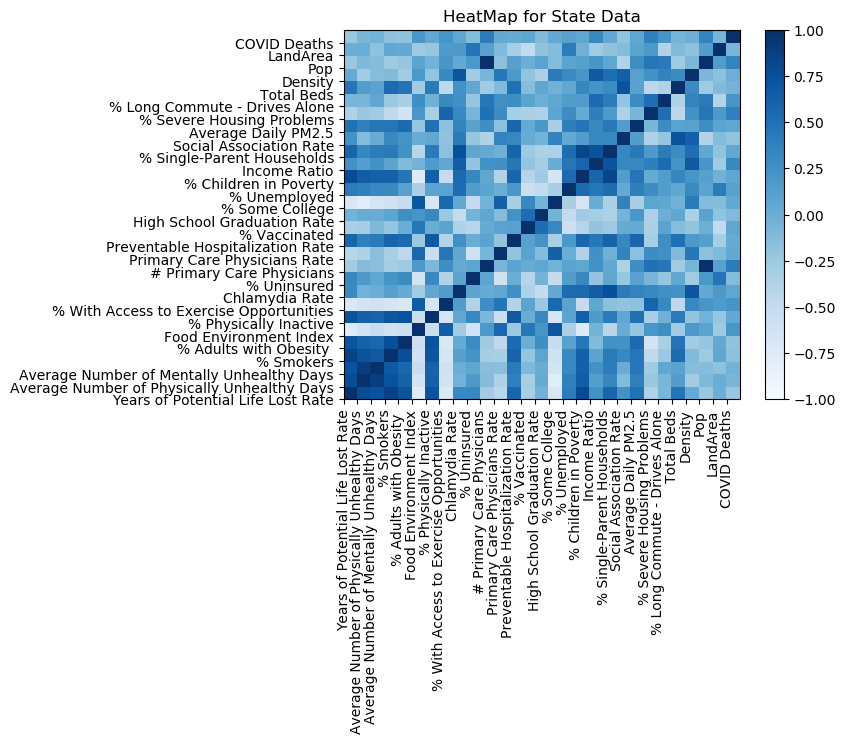

In [3]:
corr_m = df.corr()
plt.style.use('default')
heatmap = plt.pcolor(corr_m, vmin = -1, vmax = 1, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

plt.xticks((np.arange(0, 29, step=1)), ['Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', '# Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'COVID Deaths'], rotation = 90)
plt.yticks((np.arange(0, 29, step=1)), ['Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', '# Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'COVID Deaths'], rotation = 0)

plt.title("HeatMap for State Data")
print()

In [4]:
corr_m["% Smokers"]

Years of Potential Life Lost Rate              0.872402
Average Number of Physically Unhealthy Days    0.739654
Average Number of Mentally Unhealthy Days      0.686057
% Smokers                                      1.000000
% Adults with Obesity                          0.768940
Food Environment Index                        -0.603192
% Physically Inactive                          0.704300
% With Access to Exercise Opportunities       -0.662217
Chlamydia Rate                                 0.126610
% Uninsured                                    0.232123
# Primary Care Physicians                     -0.294077
Primary Care Physicians Rate                  -0.313215
Preventable Hospitalization Rate               0.600545
% Vaccinated                                  -0.207241
High School Graduation Rate                    0.084199
% Some College                                -0.606734
% Unemployed                                   0.314507
% Children in Poverty                          0

Food Environment Index, Percent of People With Access to Exercise Opportunities, Number of Primary Care Physicians, Income Ratio, Percent of People with Severe Housing Problems, Population, and percent of people with long commutes of driving alone were the variables that had over 0.20 correlation with the COVID Deaths variable. Percent of vaccinated persons, average daily PM2.5, total beds, population density, and percent of physically inactive people were variables that had correlation value of near 0. Years of Potential Life Lost Rate, Average Number of Physically Unhealthy Days, Average Number of Mentally Unhealthy Days, Percentage of Smokers, and Percentage of Adult Obesity, and physically inactive variables have a large correlation to one another. 

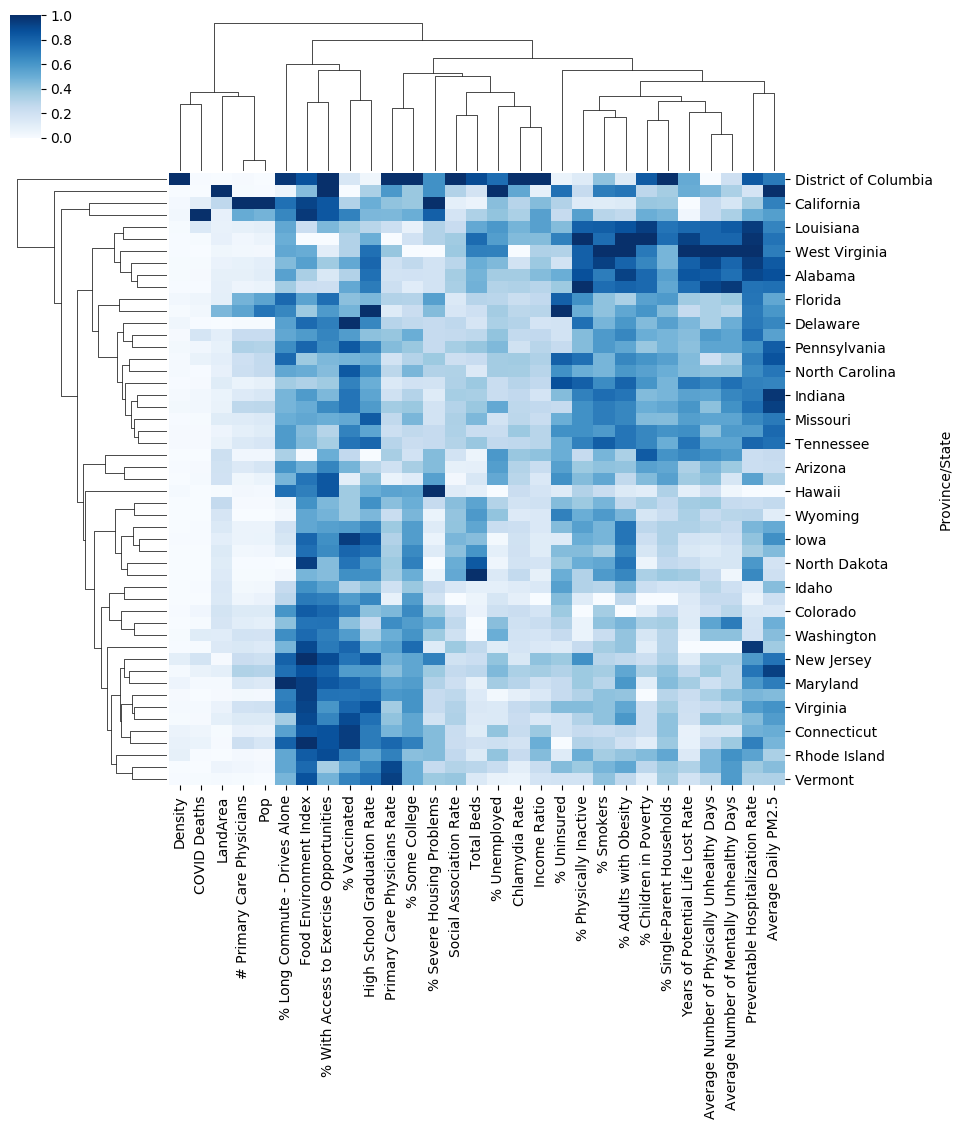

In [5]:
g = sns.clustermap(df, method="average", metric="euclidean", cmap="Blues", standard_scale = 1)

In [6]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(29):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

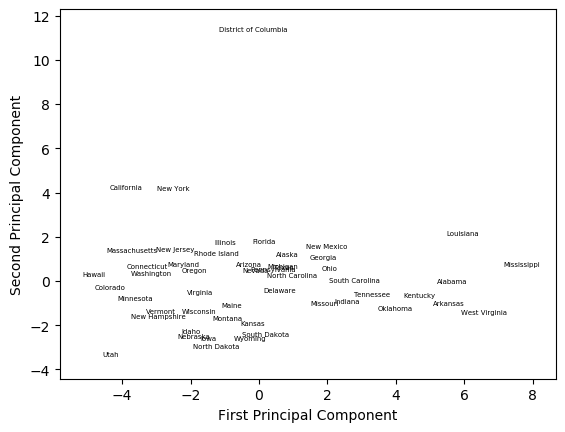

In [7]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

# Plot Principal Components 1 and 2
for i,name in enumerate(df.index.values):
    ax1.annotate(df.index[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

[3.14263585e-01 1.78108605e-01 1.29813672e-01 1.05417679e-01
 5.92775139e-02 4.27278938e-02 3.51414312e-02 2.57609419e-02
 1.87825126e-02 1.61400471e-02 1.16299723e-02 1.13160362e-02
 9.66087448e-03 6.95474803e-03 6.14458522e-03 5.29410985e-03
 4.50452388e-03 3.99317971e-03 3.29142918e-03 2.25339781e-03
 2.12533480e-03 2.00878443e-03 1.60945768e-03 1.03877123e-03
 9.62703528e-04 7.60715949e-04 5.67032834e-04 3.91332250e-04
 5.91290494e-05]


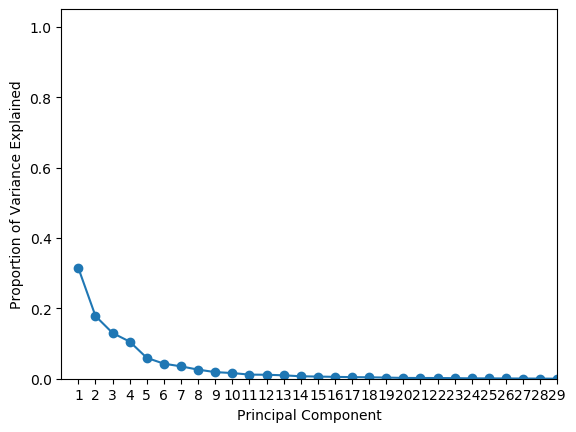

In [8]:
# Variance ratio of the 29 principal components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

pca_vals =  np.array([i+1 for i in range(29)])
pca_vals
plt.plot(pca_vals, var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0,4.25)
plt.ylim(0,1.05)
plt.xticks(pca_vals)
plt.show()

49% of the variance is explained by the first two principal component. The first four principal components account for above 10% of the variance. The PCA indicates that variance is spread fairly evenly between mutiple dimensions in the data space. There is a possibility that some of the variables explored do not have a large relationship to COVID-19 Deaths and are distorting the PCA analysis. Additionally, there are multiple variables that have large correlations to each other. This may affect the overall PCA analysis. 
Therefore, the correlation matrix between COVID-19 Deaths and the variables will be used to eliminate some of the variables that do not have a relationship with COVID-19 Deaths. This is an attempt to improve the variance that the first two PCA principles can account for. 

In [9]:
corr_m["COVID Deaths"]

Years of Potential Life Lost Rate             -0.220511
Average Number of Physically Unhealthy Days   -0.076943
Average Number of Mentally Unhealthy Days     -0.040160
% Smokers                                     -0.169920
% Adults with Obesity                         -0.183376
Food Environment Index                         0.207637
% Physically Inactive                          0.052733
% With Access to Exercise Opportunities        0.219888
Chlamydia Rate                                 0.071395
% Uninsured                                   -0.121862
# Primary Care Physicians                      0.421643
Primary Care Physicians Rate                   0.040942
Preventable Hospitalization Rate               0.027225
% Vaccinated                                   0.074335
High School Graduation Rate                   -0.108784
% Some College                                 0.040842
% Unemployed                                   0.111137
% Children in Poverty                          0

Food Environment Index, Percent of People With Access to Exercise Opportunities, Number of Primary Care Physicians, Income Ratio, Percent of People with Severe Housing Problems, Population, and percent of people with long commutes of driving alone were the variables that had over 0.20 correlation with the COVID Deaths variable.

In [10]:
df2 = df[["Food Environment Index", "% With Access to Exercise Opportunities",
         "# Primary Care Physicians", "Income Ratio", "% Severe Housing Problems","Pop",
         "% Long Commute - Drives Alone", "COVID Deaths"]]
df2

,Food Environment Index,% With Access to Exercise Opportunities,# Primary Care Physicians,Income Ratio,% Severe Housing Problems,Pop,% Long Commute - Drives Alone,COVID Deaths
Province/State,,,,,,,,
Alabama,5.8,61.0,3160.0,5.3,14,4908621,34.0,27.0
Alaska,6.3,100.0,673.0,4.1,21,734002,16.0,3.0
Arizona,6.6,85.0,4663.0,4.6,18,7378494,36.0,29.0
Arkansas,5.2,64.0,2000.0,4.8,14,3038999,27.0,10.0
California,8.9,93.0,31343.0,5.3,27,39937489,41.0,199.0
Colorado,8.4,90.0,4598.0,4.4,17,5845526,36.0,69.0
Connecticut,8.5,94.0,2985.0,5.1,18,3563077,34.0,85.0
Delaware,8.1,86.0,691.0,4.4,15,982895,34.0,11.0
District of Columbia,8.6,100.0,815.0,7.2,21,720687,49.0,9.0


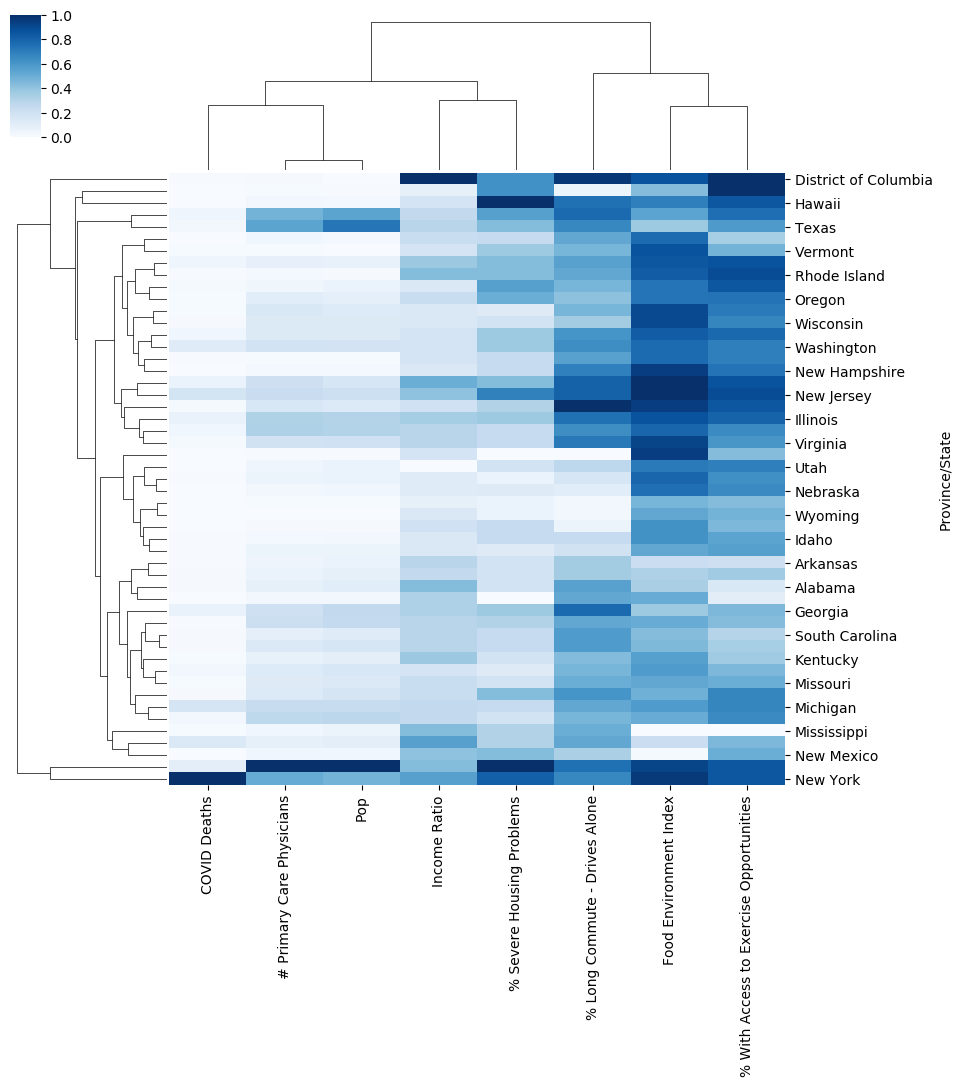

In [11]:
g = sns.clustermap(df2, method="average", metric="euclidean", cmap="Blues", standard_scale = 1)

In [12]:
scaled = scale(df2)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(8):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)
df_pca.head(10)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,-1.112707,2.128631,0.968859,-0.078684,-0.555913,-0.057300,0.335661,0.005423
1,-0.845698,-1.477655,-0.474888,0.431991,2.863446,0.347546,-0.360371,-0.054413
2,0.242696,0.139263,0.105436,-0.482209,0.668145,-0.468846,-0.329144,0.038888
3,-1.895646,1.805760,0.302303,0.164154,0.232518,-0.153678,0.100980,-0.064225
4,6.666184,1.439564,-2.595112,-1.399154,0.568594,1.160590,1.133833,-0.188392
5,0.443720,-1.156431,-0.199590,-0.320890,-0.060058,-0.414373,-0.153908,-0.011129
6,0.715772,-1.253899,0.876126,-0.021025,0.131392,0.449381,-0.109435,0.031795
7,-0.706695,-1.160391,0.234525,-0.197409,-0.240100,-0.439956,-0.228321,0.020255
8,2.545303,-0.721457,4.577140,-0.629984,-0.245362,1.650271,-0.179593,0.118099
9,2.697108,0.940976,-1.144501,-1.134462,0.484640,-0.223055,-0.387352,0.043617


[0.44298403 0.18362692 0.1378426  0.09893284 0.07469019 0.03982078
 0.02110953 0.00099311]


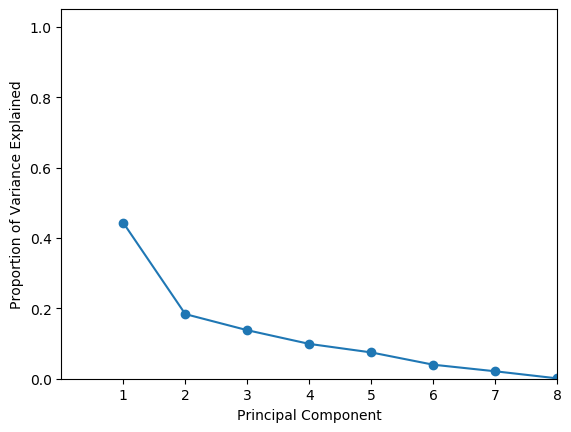

In [13]:
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

pca_vals =  np.array([i+1 for i in range(8)])
pca_vals
plt.plot(pca_vals, var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0,4.25)
plt.ylim(0,1.05)
plt.xticks(pca_vals)
plt.show()

Nearly 63% of the variance is captured by the first two components in the analysis. This is a large improvement from the previous data set. 

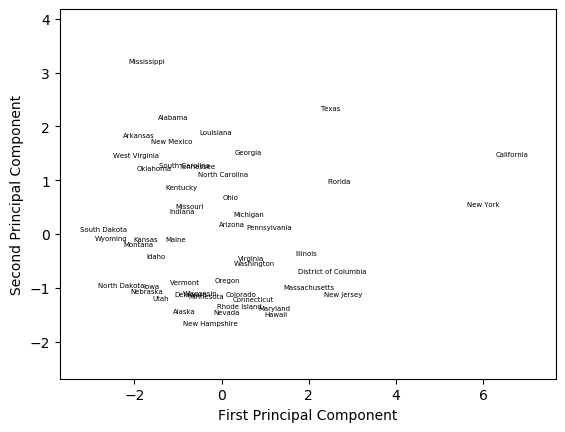

In [14]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

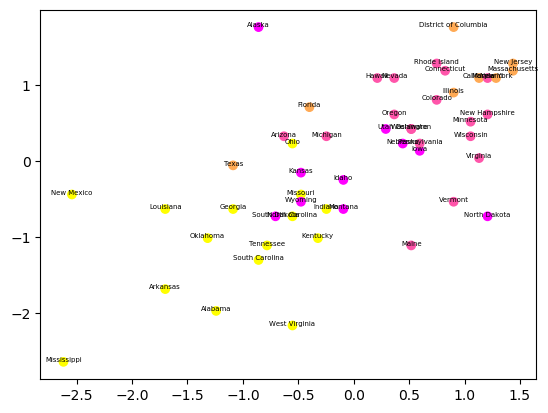

In [15]:
fig,ax1 = plt.subplots()

scaled = scale(df2)

y_pred = KMeans(n_clusters=4, n_init=1, init='random', max_iter=5).fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c=y_pred, cmap = 'spring');

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (scaled[i, 0], scaled[i, 1]), ha='center',fontsize=5)

plt.show()

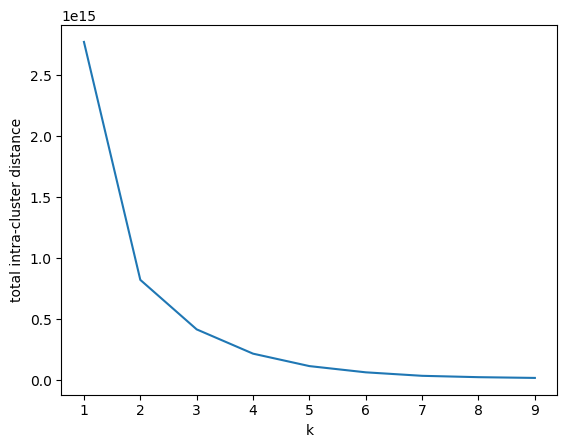

In [16]:
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(df2)
    scores.append(-model.score(df2))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

K=4 is the best k value. 

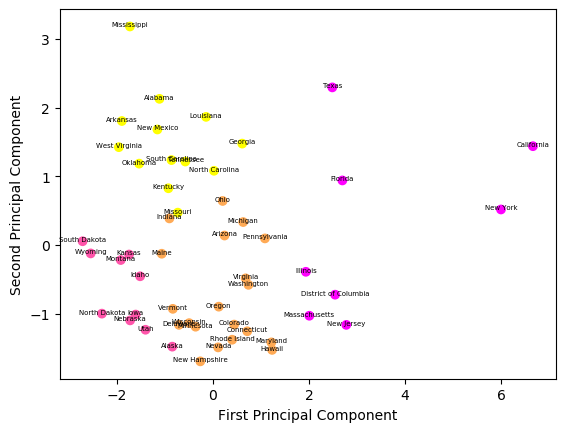

In [17]:
scaled = scale(df2)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(8):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

fig,ax1 = plt.subplots()

y_pred = KMeans(n_clusters=4, n_init=1, init='random', max_iter=5).fit_predict(df_pca)
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred, cmap = 'spring');

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

In [18]:
from scipy.cluster import hierarchy

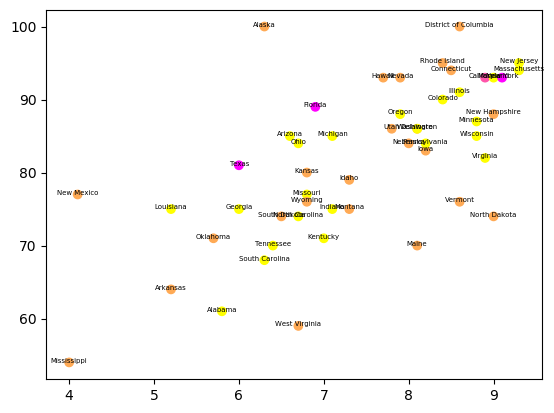

In [19]:
Z = hierarchy.linkage(df2, 'ward') # generate the linkage array

fig,ax1 = plt.subplots()

y_pred = hierarchy.fcluster(Z=Z, t=4, criterion='maxclust')
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=y_pred,  marker="o", cmap='spring');

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (df2.iloc[i, 0], df2.iloc[i, 1]), ha='center',fontsize=5)

plt.show()

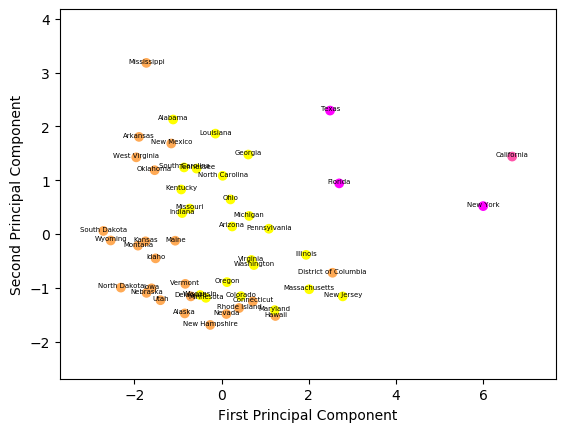

In [20]:
scaled = scale(df2)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(8):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

Z = hierarchy.linkage(df2, 'ward')

fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

y_pred = hierarchy.fcluster(Z=Z, t=4, criterion='maxclust')
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred,  marker="o", cmap='spring'); 

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 18


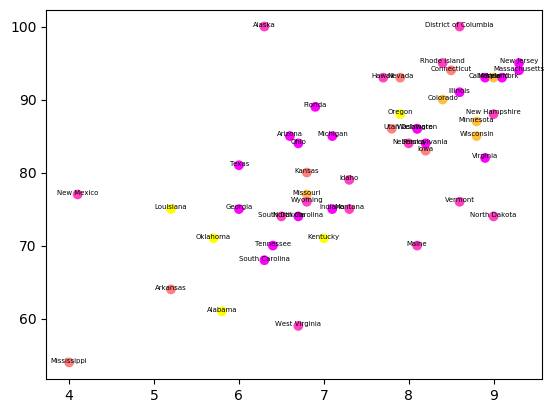

In [21]:
db_model = DBSCAN(eps=369000, min_samples=4)
db_model.fit(df2)
y_pred = db_model.fit_predict(df2)

fig,ax1 = plt.subplots()

plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=y_pred,  marker="o", cmap= 'spring'); 

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot Principal Components 1, 2, and 3
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (df2.iloc[i,0], df2.iloc[i,1]), ha='center',fontsize=5)

plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 19


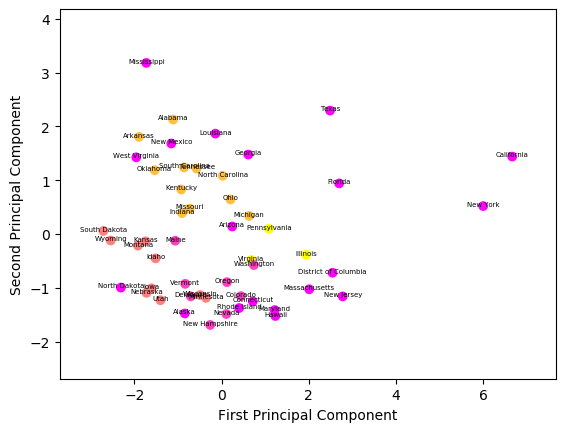

In [22]:
scaled = scale(df2)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(8):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

db_model = DBSCAN(eps=1.3, min_samples=3)
db_model.fit(df_pca)
y_pred = db_model.fit_predict(df_pca)

fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred,  marker="o", cmap= 'spring'); 

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot Principal Components 1 and 2
for i,name in enumerate(df2.index.values):
    ax1.annotate(df2.index[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

In [23]:
from mpl_toolkits.mplot3d import axes3d

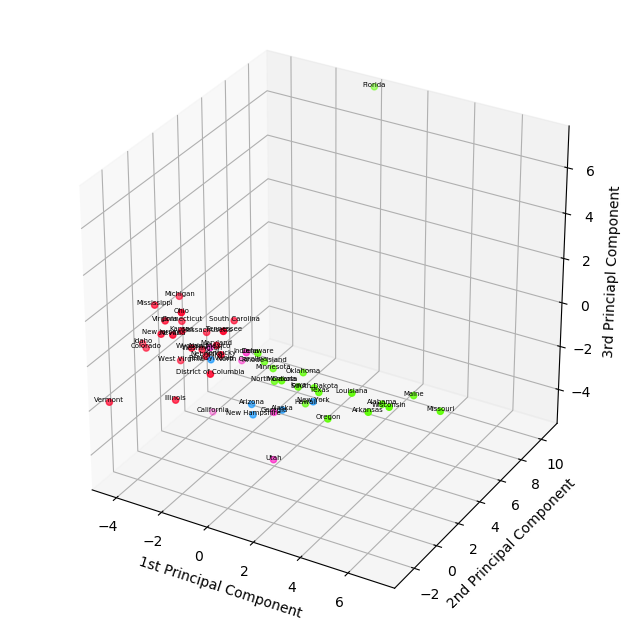

In [24]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(29):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlim(X_PCA[:,0].min(),X_PCA[:,0].max())
ax1.set_ylim(X_PCA[:,1].min(),X_PCA[:,1].max())
ax1.set_zlim(X_PCA[:,2].min(),X_PCA[:,2].max())

y_pred = KMeans(n_clusters=4, n_init=1, init='random', max_iter=5).fit_predict(df_pca)
ax1.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:,2], c=y_pred, cmap = 'gist_rainbow');

# Plot Principal Components 1 and 2
for i,name in enumerate(df.index.values):
    ax1.text(X_PCA[i, 0], X_PCA[i, 1], X_PCA[i, 2], states[i], ha='center',fontsize=5)
    
ax1.set_xlabel('1st Principal Component')
ax1.set_ylabel('2nd Principal Component')
ax1.set_zlabel('3rd Princiapl Component')

plt.show()

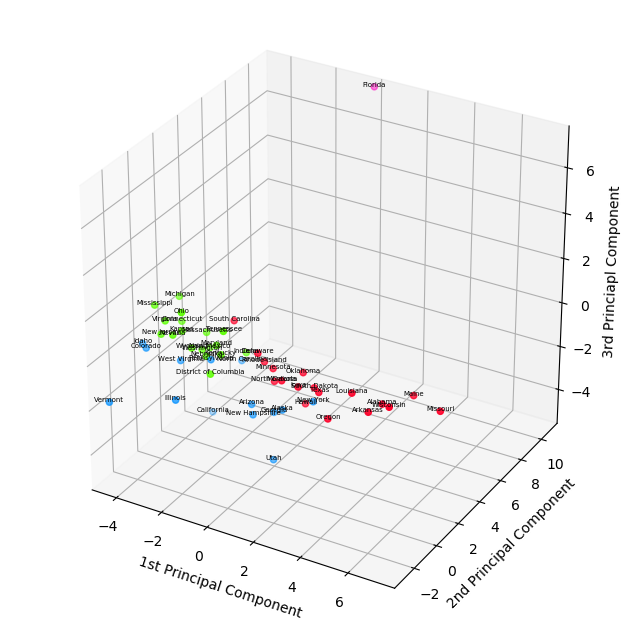

In [25]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(29):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

Z = hierarchy.linkage(df_pca, 'ward') 

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlim(X_PCA[:,0].min(),X_PCA[:,0].max())
ax1.set_ylim(X_PCA[:,1].min(),X_PCA[:,1].max())
ax1.set_zlim(X_PCA[:,2].min(),X_PCA[:,2].max())

y_pred = hierarchy.fcluster(Z=Z, t=4, criterion='maxclust')
ax1.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:,2], c=y_pred, marker = "o", cmap = 'gist_rainbow');

for i,name in enumerate(df.index.values):
    ax1.text(X_PCA[i, 0], X_PCA[i, 1], X_PCA[i, 2], states[i], ha='center',fontsize=5)
    
ax1.set_xlabel('1st Principal Component')
ax1.set_ylabel('2nd Principal Component')
ax1.set_zlabel('3rd Princiapl Component')

plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 8


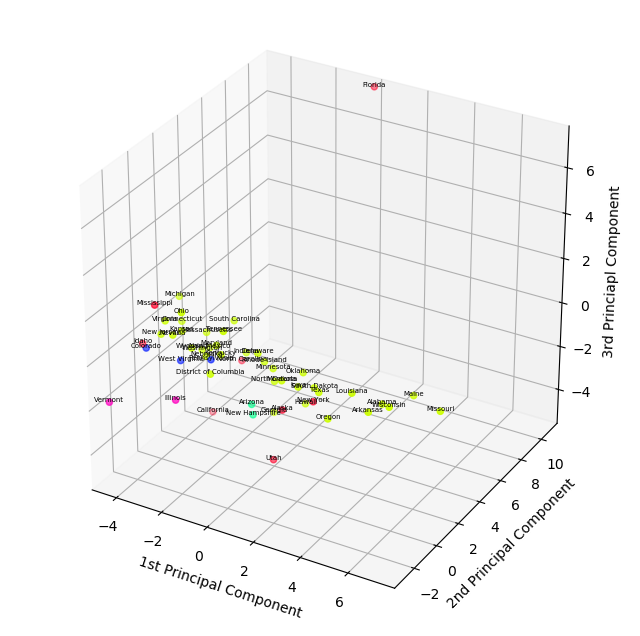

In [26]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
pca_arr = []

for i in range(29):
    i = i+1
    string = "PCA" + str(i)
    pca_arr.append(string)
    
pca_arr
df_pca = pd.DataFrame(X_PCA, columns=pca_arr)

db_model = DBSCAN(eps=4, min_samples=2)
db_model.fit(df_pca)
y_pred = db_model.fit_predict(df_pca)

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlim(X_PCA[:,0].min(),X_PCA[:,0].max())
ax1.set_ylim(X_PCA[:,1].min(),X_PCA[:,1].max())
ax1.set_zlim(X_PCA[:,2].min(),X_PCA[:,2].max())

ax1.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], df_pca.iloc[:,2], c=y_pred,  marker="o", cmap= 'gist_rainbow')

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

for i,name in enumerate(df.index.values):
    ax1.text(X_PCA[i, 0], X_PCA[i, 1], X_PCA[i, 2], states[i], ha='center',fontsize=5)
    
ax1.set_xlabel('1st Principal Component')
ax1.set_ylabel('2nd Principal Component')
ax1.set_zlabel('3rd Princiapl Component')

plt.show()

CONCLUSION